# Основы машинного обучения: лабораторная работа №1
## Задание 3. Знакомство с Pandas

В этом задании необходимо научиться базовым приемам работы с данными. Необходимо загрузить заданный по варианту датасет, провести разведочный анализ данных, сформулировать гипотезы о возможном значении всех полей в датасете, проверить эти гипотезы, и ответить на вопросы по данным. <!-- Если в конкретном задании не указано иное, проводить очистку данных (удаление пустых и невалидных значений) не нужно. -->

### Цель

Знакомство с разведочным анализом данных и применение Pandas для извлечения информации

### Оценивание и баллы

За это задание в общей сложности можно получить до 4 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Важные замечания

1. *Откройте этот файл в своем репозитории на GitHub и скопируйте адрес из адресной строки браузера. Перейдите в [Google Colab](https://colab.research.google.com/), выберите `Файл -> Открыть ноутбук -> GitHub`, вставьте скопированный URL и нажмите кнопку поиска (кнопка с лупой справа от поля ввода строки для поиска). В Google Colab откроется копия этого ноутбука из персонального репозитория на GitHub.*
2. *Не удаляйте и не изменяйте имена переменных в ячейках с кодом ниже. Можно добавлять в каждую ячейку произвольное количество строк кода, главное - сохранить результат решения задачи в предопределенную (-ые) переменную (-ые) в соответствующей ячейке. Если этого не сделать, автоматические тесты не будут пройдены.*
3. *Чтобы сохранить работу, выберите `Файл -> Сохранить копию на GitHub` и __вручную выберите правильный репозиторий из раскрывающегося списка__.*
4. *Если в процессе выполнения задания этот файл окажется испорчен, ознакомьтесь с инструкцией в ноутбуке [jupyter_assignment](jupyter_assignment.ipynb), раздел "Повторная сдача".*  


#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [1]:
### BEGIN YOUR CODE

Student_ID = 4

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [2]:
datasets = [('Chipotle','https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'), ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'), ('Open Food Facts', 'https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/en.openfoodfacts.org.products.tsv.tar.bz2')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")
    print(f"В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № {dataset_id+1}")

Датасет 'US Air Carrier market in 2019' доступен по следующей ссылке: https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
В заданиях ниже, где нужно выбрать вопрос, всегда выбирайте вопрос № 2


Скачайте датасет с помощью команды `!wget <dataset_url>`, где `<dataset_url>` необходимо заменить на ссылку на датасет, появившуюся после выполнения предыдущей ячейки. При необходимости разархивируйте датасет, используя команды `!unzip`, `!tar` и др.

*Примечание: в Jupyter-ноутбуке можно использовать любые команды командного интерпретатора bash. Для этого необходимо поставить в ячейке с кодом восклицательный знак `!`, после которого записать команду bash со всеми необходимыми аргументами. Результат выполнения этой команды bash будет возвращен в Jupyter и его можно использовать в коде на Python.*

In [3]:
### BEGIN YOUR CODE

# !wget PLACE_DATASET_URL_HERE

# !unzip ...
# !tar ...
# !gunzip ...

# Скачиваем архив с датасетом
!wget https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip

# Разархивируем датасет в текущую папку
!unzip -o aircarrier_market_us_2019.zip

### END YOUR CODE

--2025-04-20 17:00:18--  https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10159563 (9.7M) [application/zip]
Saving to: ‘aircarrier_market_us_2019.zip’

aircarrier_market_u 100%[===================>]   9.69M  64.2MB/s    in 0.2s    

2025-04-20 17:00:19 (64.2 MB/s) - ‘aircarrier_market_us_2019.zip’ saved [10159563/10159563]

Archive:  aircarrier_market_us_2019.zip
  inflating: aircarrier_market_us_2019.csv  


##### 2. Загрузите датасет в pandas.DataFrame, сохраните его в переменной `df`. Cконвертируйте названия столбцов в нижний регистр

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Загрузка датасета из CSV файла
df = pd.read_csv('aircarrier_market_us_2019.csv')

# Конвертация названий столбцов в нижний регистр
df.columns = df.columns.str.lower()

# Проверим результат
print(df.head())
# Place your code to read the dataset here. Don't forget to import all the libraries you need!

   passengers    freight  mail  distance unique_carrier  airline_id  \
0         0.0    53185.0   0.0    8165.0             EK       20392   
1         0.0     9002.0   0.0    6849.0             EK       20392   
2         0.0  2220750.0   0.0    7247.0             EK       20392   
3         0.0  1201490.0   0.0    8165.0             EK       20392   
4         0.0   248642.0   0.0    6849.0             EK       20392   

  unique_carrier_name unique_carrier_entity region carrier  ... dest_state_nm  \
0            Emirates                 9678A      I      EK  ...         Texas   
1            Emirates                 9678A      I      EK  ...      New York   
2            Emirates                 9678A      I      EK  ...      Illinois   
3            Emirates                 9678A      I      EK  ...           NaN   
4            Emirates                 9678A      I      EK  ...           NaN   

   dest_country     dest_country_name  dest_wac  year  quarter month  \
0            U

##### 3. Какие столбцы присутствуют в наборе данных? (0.1 балла)

In [5]:
#columns = ... # Place your code here instead of '...'
columns = df.columns.tolist()
print(columns) #Это было изначально

['passengers', 'freight', 'mail', 'distance', 'unique_carrier', 'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region', 'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new', 'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips', 'origin_state_nm', 'origin_country', 'origin_country_name', 'origin_wac', 'dest_airport_id', 'dest_airport_seq_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name', 'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class', 'data_source']


##### 4. Ответьте на вопрос и сохраните ответ в переменной `answer1` (0.1 балла)

Вопросы:
1. Какое блюдо (`item_name`) заказывали чаще всего?
2. Сколько авиаперевозчиков (`carrier`) представлены в датасете?
3. По скольким продуктам в датасете имеется информация о содержании аллергенов (`allergens`)?

In [6]:
#answer1 = ... # Place your code here instead of '...'
answer1 = df['carrier'].nunique()
print(answer1)

319


##### 5. Ответьте на вопрос и сохраните ответ в переменной `answer2` (0.1 балла)

Вопросы:
1. Сколько всего было заказов блюда, название которого сохранено в `answer1`?
2. Посчитайте общие суммарные количества перевезенных пассажиров (`passengers`), фунтов груза (`freight`) и почты (`mail`) на маршруте из Великобритании (GB) в США (US). В `answer2` запишите максимальное из трех получившихся чисел.
3. Сколько всего продуктов, относящихся к категории "молочные" (`Dairies,Milks`), с заполненным названием?

In [7]:
#answer2 = ... # Place your code here instead of '...'

# Фильтруем данные по маршруту из Великобритании (GB) в США (US)
# Фильтруем по странам в столбцах origin_country и dest_country
filtered = df[(df['origin_country'] == 'GB') & (df['dest_country'] == 'US')]

# Суммируем пассажиров, груз и почту
total_passengers = filtered['passengers'].sum()
total_freight = filtered['freight'].sum()
total_mail = filtered['mail'].sum()

# Записываем максимальное из трех значений в answer2
answer2 = max(total_passengers, total_freight, total_mail)

print(answer2)

903296879.0


##### 6. Ответьте на вопрос и сохраните ответ в переменной `answer3` (0.2 балла)

Вопросы:
1. Какой доход получила сеть Chipotle Mexican Grill на заказах, попавших в датасет?
2. Какой авиаперевозчик (`unique_carrier_name`) перевез больше всего груза (`mail` + `freight`)?
3. Как называется продукт категории `Fats` с максимальной жирностью, не превышающей 30 г на 100 г продукта?

In [8]:
#answer3 = ... # Place your code here instead of '...'
# Считаем суммарный груз (mail + freight) для каждого unique_carrier_name
df['total_cargo'] = df['mail'] + df['freight']

# Группируем по unique_carrier_name, суммируем груз и находим перевозчика с максимальным грузом
answer3 = df.groupby('unique_carrier_name')['total_cargo'].sum().idxmax()

print(answer3)

Federal Express Corporation


##### 7. Ответьте на вопрос и сохраните ответ в переменной `answer4` (0.25 балла)

Вопросы:
1. Каков средний доход с одного заказа?
2. Какое максимальное количество пассажиров одна авиакомпания смогла перевезти из США в другие страны за все время?
3. Какова энергетическая ценность в кДж продукта из России (`countries_en`) имеющего максимальное содержание холестерина?

In [9]:
#answer4 = ... # Place your code here instead of '...'
# Фильтруем данные по рейсам из США (origin_country == 'US') в другие страны (dest_country != 'US')
filtered = df[(df['origin_country'] == 'US') & (df['dest_country'] != 'US')]

# Сгруппируем по unique_carrier_name, суммируем пассажиров
passengers_by_carrier = filtered.groupby('unique_carrier_name')['passengers'].sum()

# Находим максимальное количество пассажиров, перевезённых одной авиакомпанией
answer4 = passengers_by_carrier.max()
print(answer4)

14867653.0


##### 8. Ответьте на вопрос и сохраните ответ в переменной `answer5` (0.25 балл)

Вопросы:
1. Сколько раз был заказан самый популярный напиток (Coke, Sprite, Mountain Dew и т.п.)?
2. Между какими двумя городами было перевезено наибольшее количество пассажиров? Учтите оба направления. Ответ запишите в виде списка из двух строк.
3. Приведите названия всех аллергенов к нижнему регистру. Какой аллерген встречается в продуктах чаще всего?

In [10]:
#answer5 = ... # Place your code here instead of '...'
# Создадим столбец с упорядоченной парой городов (чтобы учесть оба направления)
df['city_pair'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)

# Группируем по паре городов и суммируем пассажиров
passengers_by_city_pair = df.groupby('city_pair')['passengers'].sum()

# Находим пару городов с максимальным количеством пассажиров
max_pair = passengers_by_city_pair.idxmax()

# Записываем ответ в виде списка из двух строк
answer5 = [max_pair[0], max_pair[1]]

print(answer5)

['Chicago, IL', 'New York, NY']


##### 9. Ответьте на вопрос и сохраните ответ в переменной `answer6` (0.5 балл)

Вопросы:
1. Какой суммарный доход принесли напитки в заказах вегетарианцев?
2. Для пары городов из предыдущего вопроса найдите 3 авиакомпании, которые перевезли больше всего пассажиров. Посчитайте, какой процент от общего пассажиропотока между этими городами перевезла каждая из трех авиакомпаний. В `answer6` запишите найденные проценты в виде списка из трех чисел, округлив их до двух знаков после запятой.
3. Найдити самый опасный продукт, содержащий наибольшее количество аллергенов.

In [14]:
#answer6 = ... # Place your code here instead of '...'
# Используем пару городов из предыдущего ответа answer5
city1, city2 = answer5

# Создаем столбец с упорядоченной парой городов, чтобы учесть оба направления
df['city_pair'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)

# Фильтруем данные по выбранной паре городов
filtered = df[df['city_pair'] == (city1, city2)]

# Считаем суммарное количество пассажиров для каждой авиакомпании на этом маршруте
passengers_by_carrier = filtered.groupby('unique_carrier_name')['passengers'].sum()

# Берем топ-3 авиакомпании по пассажиропотоку
top3 = passengers_by_carrier.sort_values(ascending=False).head(3)

# Общий пассажиропоток между этими городами (по условию задачи)
total_passengers = passengers_by_carrier.sum()

# Вычисляем процент пассажиров, перевезенных каждой из топ-3 авиакомпаний, округляем до 2 знаков
answer6 = [round((count / total_passengers) * 100, 2) for count in top3]

print(answer6)

[np.float64(31.31), np.float64(23.23), np.float64(13.33)]


##### 10. Ответьте на вопрос и сохраните ответ в переменной `answer7` (0.5 балл)

Вопросы:
1. Сколько было сделано вегетарианских заказов? Заказ не считается вегетарианским, если в нем были не вегетарианские блюда.
2. Для каждой страны найдите процент международного пассажиропотока (относительно США), используя общее количество пассажиров на рейсах класса F. В `answer7` запишите название страны с третьим по величине пассажиропотоком в/из США.
3. Переведите названия групп продуктов (`pnns_groups_1`, `pnns_groups_2`) в нижний регистр. В переменную `answer7` запишите список, содержащий три элемента: название группы продуктов 1, название группы продуктов 2 и среднее количество пищевых волокон (fiber) для седьмой по насыщенности пищевыми волокнами группы продуктов.

In [17]:
#answer7 = ... # Place your code here instead of '...'
# Фильтруем данные по рейсам класса F (премиум-класс)
df_f = df[df['class'] == 'F']

# Фильтруем международные рейсы с участием США и создаём копию, чтобы не менять исходный df
df_f_intl = df_f[((df_f['origin_country'] == 'US') & (df_f['dest_country'] != 'US')) |
                 ((df_f['dest_country'] == 'US') & (df_f['origin_country'] != 'US'))].copy()

# Создаём новый столбец foreign_country в копии, не меняя оригинал
foreign_countries = df_f_intl.apply(
    lambda row: row['dest_country'] if row['origin_country'] == 'US' else row['origin_country'], axis=1)

# Группируем по иностранной стране и считаем суммарное количество пассажиров
passengers_by_country = df_f_intl.groupby(foreign_countries)['passengers'].sum()

# Считаем общий пассажиропоток (международный премиум-класс) для нормировки процентов
total_passengers = passengers_by_country.sum()

# Считаем процент пассажиропотока каждой страны относительно общего
percent_by_country = (passengers_by_country / total_passengers) * 100

# Сортируем по убыванию и выбираем страну с третьим по величине пассажиропотоком
answer7 = percent_by_country.sort_values(ascending=False).index[2]
print(answer7)

GB


##### 11. Ответьте на вопрос и сохраните ответ в переменной `answer8` (1 балл)

Вопросы:
1. Какой соус или дополнительный ингредиент по выбору (`choice_description`) чаще всего берут вместе с буррито с курицей (Chicken Burrito)?
2. В каком месяце пассажиропоток между городами, записанными в переменную `answer5`, был максимальным?
3. Какое название у группы продуктов `pnns_groups_2`, являющейся наиболее сбалансированной с точки зрения среднего содержания белков, жиров и углеводов? Под "сбалансированной" понимать близость БЖУ к пропорции 1:1:4.

In [19]:
#answer8 = ... # Place your code here instead of '...'
import calendar

# Используем пару городов из предыдущего ответа answer5
city1, city2 = answer5

# Создаем столбец с упорядоченной парой городов, чтобы учесть оба направления
df['city_pair'] = df.apply(lambda row: tuple(sorted([row['origin_city_name'], row['dest_city_name']])), axis=1)

# Фильтруем данные по выбранной паре городов
filtered = df[df['city_pair'] == (city1, city2)]

# Группируем по месяцам и суммируем пассажиров
passengers_by_month = filtered.groupby('month')['passengers'].sum()

# Находим месяц с максимальным пассажиропотоком
answer8 = passengers_by_month.idxmax()
print(answer8)
month_name = calendar.month_name[answer8]
print(month_name)

5
May


##### 12. Визуализируйте данные в соответствии с заданием (1 балл)

1. Постройте гистограмму распределения общей стоимости заказов. Найти и отметить на графике средний чек и медианную стоимость заказа.
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
3. Постройте столбчатую гистограмму усредненной по группам продуктов энергетической ценности, с группировкой по `pnns_groups_1`.


<ipython-input-22-ad15efb64229>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


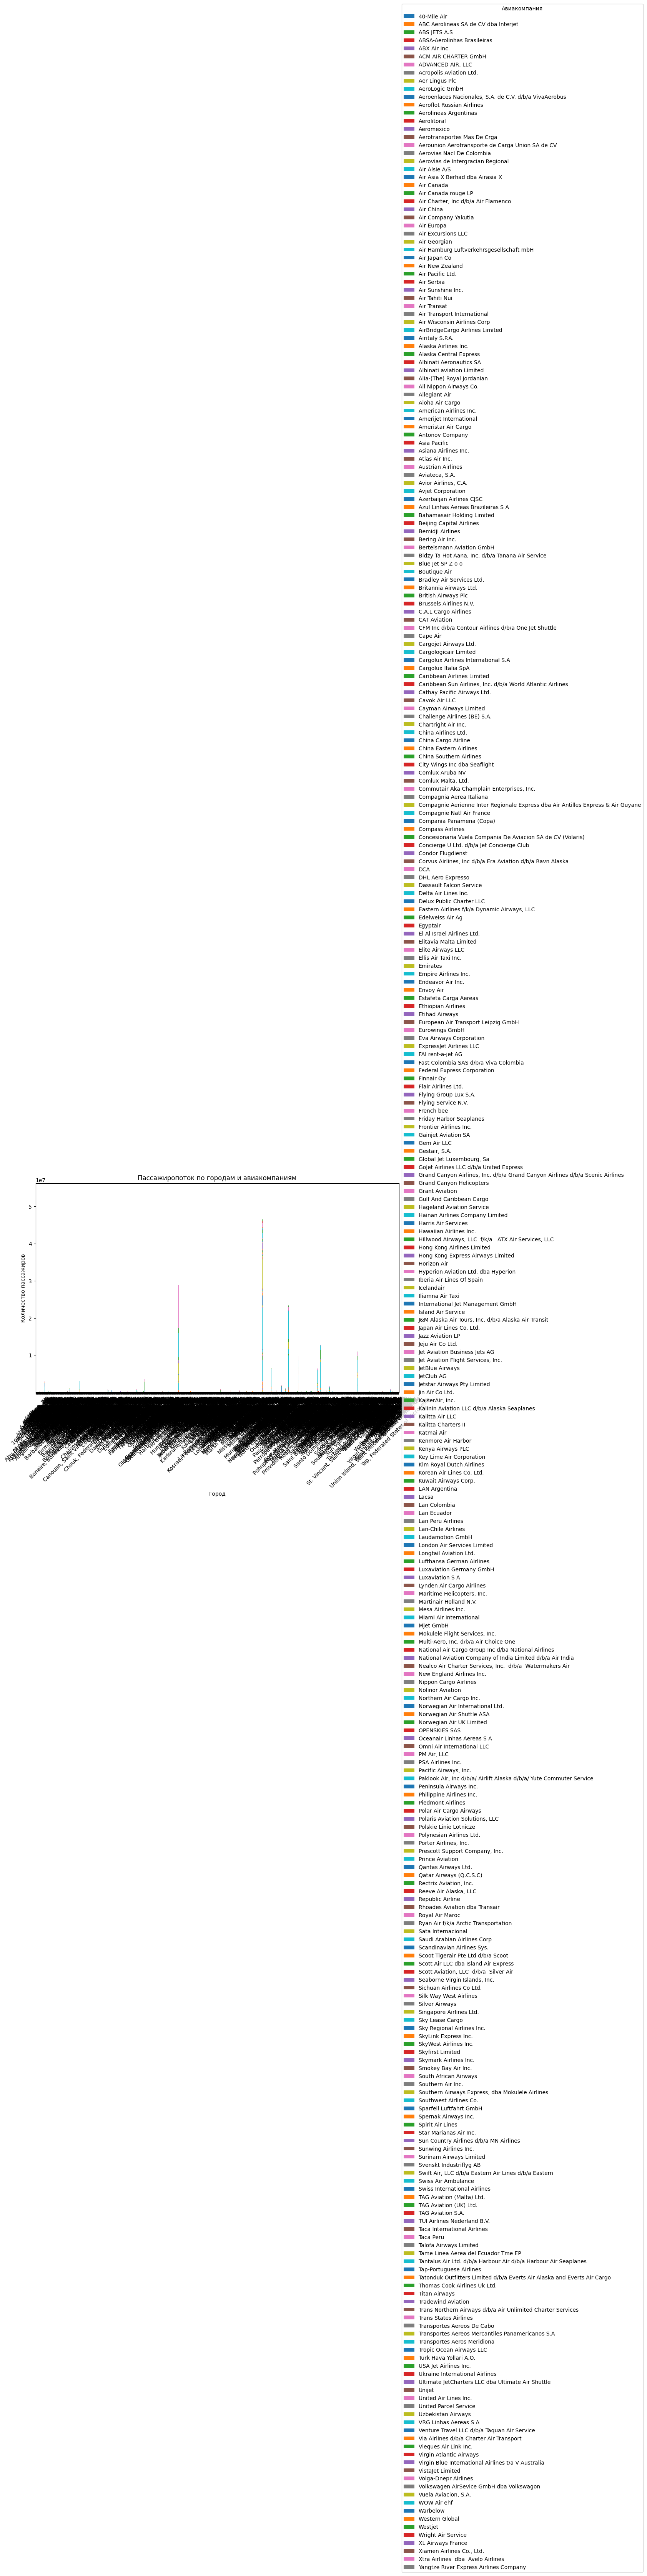

In [22]:
# Place your code here
# Группируем по городам отправления и авиакомпаниям, суммируем пассажиров
grouped = df.groupby(['origin_city_name', 'unique_carrier_name'])['passengers'].sum().unstack(fill_value=0)
# Построение графика
ax = grouped.plot(kind='bar', stacked=True, figsize=(14,8))

# Настройка графика
plt.title('Пассажиропоток по городам и авиакомпаниям')
plt.xlabel('Город')
plt.ylabel('Количество пассажиров')

# Легенда с фиксированным расположением и выносом за пределы графика
plt.legend(title='Авиакомпания', loc='center left', bbox_to_anchor=(1.0, 0.5))

# Поворот подписей по оси X
plt.xticks(rotation=45)

# Подгонка отступов
plt.tight_layout()
plt.subplots_adjust(right=0.8, bottom=0.2)
plt.show()

##### 12. Визуализируйте данные в соответствии с заданием (1 балл)
2. Постройте стековую столбчатую гистограмму пассажиропотока с разбивкой по городам (отдельные столбцы) и авиакомпаниям (разбивка внутри столбца).
####Гистограмма где показано, только 10 городов с самым большим пассажирооборотом

<ipython-input-25-54c83bf5cd7e>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


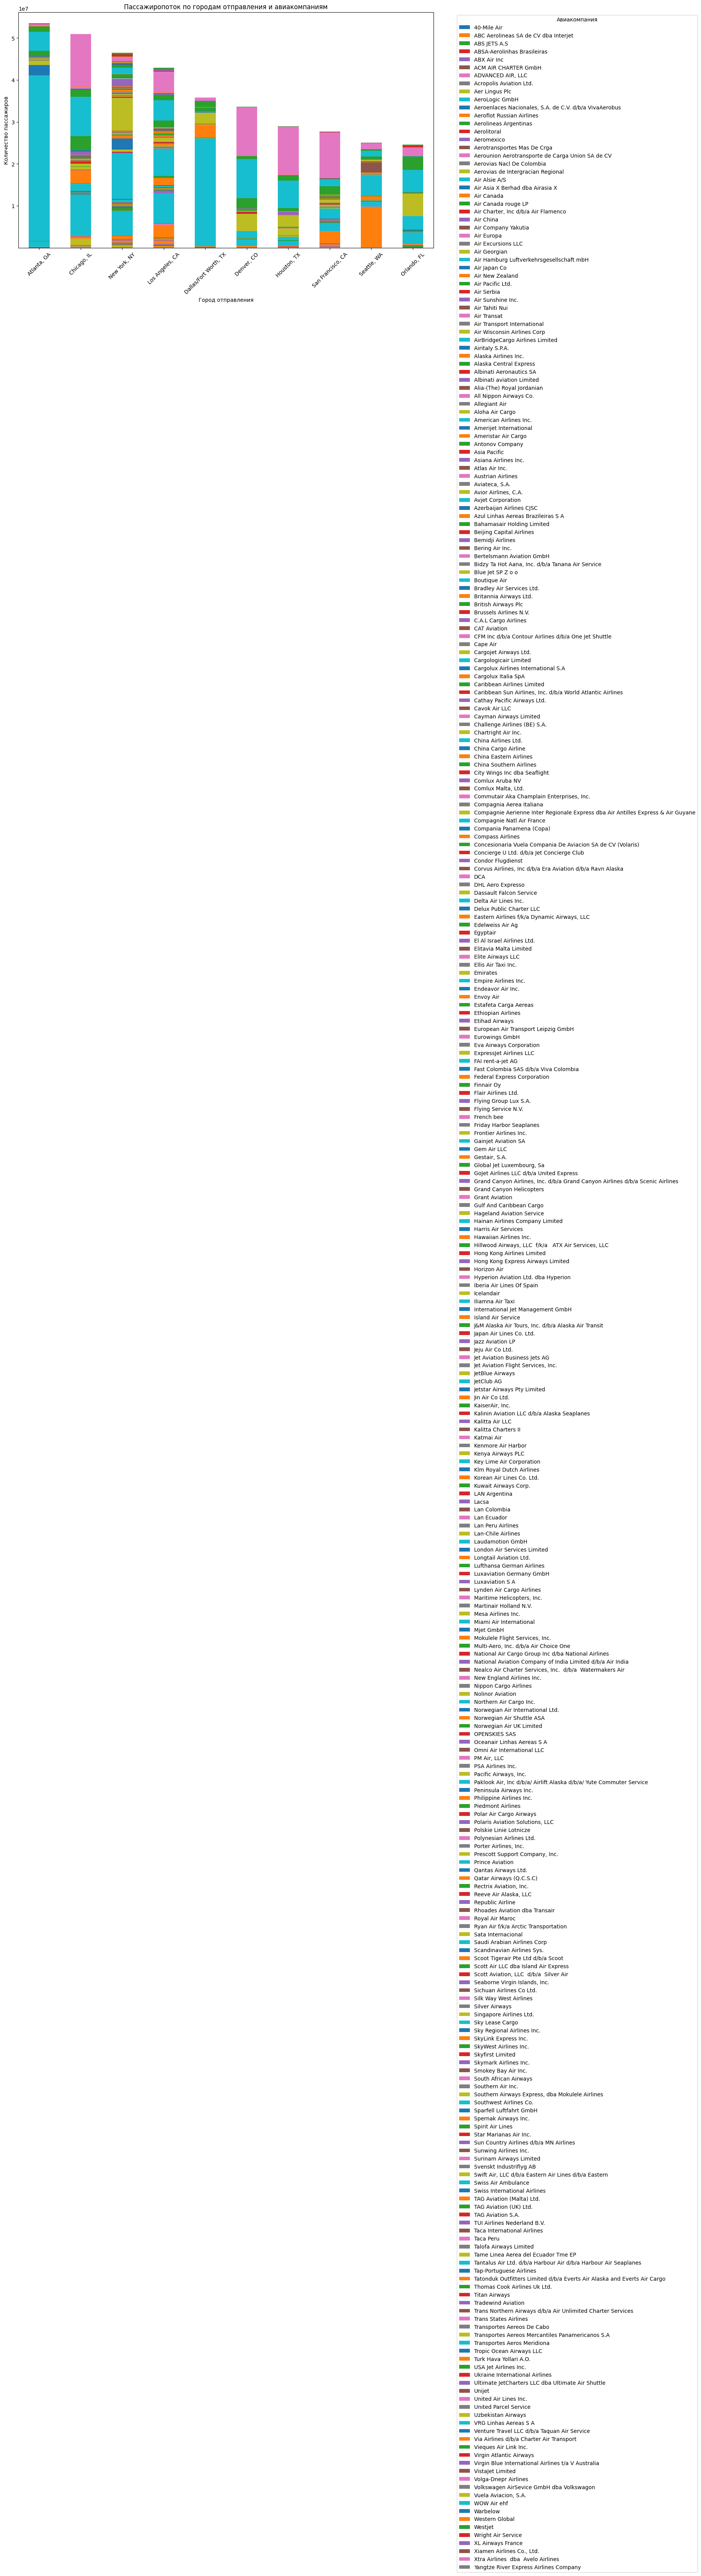

In [25]:
# Группируем по городам отправления и авиакомпаниям, суммируем пассажиров
grouped2 = df.groupby(['origin_city_name', 'unique_carrier_name'])['passengers'].sum().unstack(fill_value=0)

# Выбираем топ-10 городов по общему пассажиропотоку
top_cities = grouped2.sum(axis=1).sort_values(ascending=False).head(10).index

# Берем данные только по топ-10 городам
grouped_top = grouped2.loc[top_cities]

# Строим стековую столбчатую гистограмму
ax = grouped_top.plot(kind='bar', stacked=True, figsize=(14, 8))

ax.set_title('Пассажиропоток по городам отправления и авиакомпаниям')
ax.set_xlabel('Город отправления')
ax.set_ylabel('Количество пассажиров')
ax.legend(title='Авиакомпания', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()